In [15]:
!unzip 'dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dataset/test/happiness/images (53)_face.png  
  inflating: dataset/test/happiness/images (54)_face.png  
  inflating: dataset/test/happiness/images (55)_face.png  
  inflating: dataset/test/happiness/images (56)_face.png  
  inflating: dataset/test/happiness/images (58)_face.png  
  inflating: dataset/test/happiness/images (59)_face.png  
  inflating: dataset/test/happiness/images (66)_face.png  
  inflating: dataset/test/happiness/images (67)_face.png  
  inflating: dataset/test/happiness/images (68)_face.png  
  inflating: dataset/test/happiness/images (69)_face.png  
  inflating: dataset/test/happiness/images (7)_face.png  
  inflating: dataset/test/happiness/images (71)_face.png  
  inflating: dataset/test/happiness/images (72)_face.png  
  inflating: dataset/test/happiness/images (73)_face.png  
  inflating: dataset/test/happiness/images (74)_face.png  
  inflating: dataset/test/happiness/images (77)_face.png  
  infl

### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

### Building Model

In [8]:
base_model = MobileNet(input_shape=(224,224,3), include_top=False)
for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=8, activation='softmax')(x)

model = Model(base_model.input, x)
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

### Preparing/Preprocessing our dataset

In [9]:
train_dataset_gen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    rescale = 1/255
)
train_dataset = train_dataset_gen.flow_from_directory(directory='dataset/train',
                                                      target_size=(224,224),
                                                      batch_size=32,
                                                      )
train_dataset.class_indices

Found 3912 images belonging to 8 classes.


{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happiness': 4,
 'neutrality': 5,
 'sadness': 6,
 'surprise': 7}

In [10]:
test_dataset_gen = ImageDataGenerator(rescale = 1./255)
test_dataset = test_dataset_gen.flow_from_directory(directory= "dataset/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )
test_dataset.class_indices

Found 1646 images belonging to 8 classes.


{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happiness': 4,
 'neutrality': 5,
 'sadness': 6,
 'surprise': 7}

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')
mc = ModelCheckpoint(filepath="model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

call_back = [es, mc]

In [12]:
hist = model.fit_generator(train_dataset,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= test_dataset,
                           validation_steps= 8,
                           callbacks=[es,mc])

C:\Users\ashis\AppData\Local\Temp\ipykernel_5408\3822088385.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_dataset,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 17.5283 - accuracy: 0.1719
Epoch 1: val_accuracy improved from -inf to 0.24219, saving model to model.h5


C:\Users\ashis\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 19s 2s/step - loss: 17.5283 - accuracy: 0.1719 - val_loss: 10.9375 - val_accuracy: 0.2422
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 9.9346 - accuracy: 0.3281
Epoch 2: val_accuracy improved from 0.24219 to 0.36719, saving model to model.h5
10/10 [==============================] - 16s 2s/step - loss: 9.9346 - accuracy: 0.3281 - val_loss: 7.3690 - val_accuracy: 0.3672
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 7.3550 - accuracy: 0.4437
Epoch 3: val_accuracy did not improve from 0.36719
10/10 [==============================] - 15s 2s/step - loss: 7.3550 - accuracy: 0.4437 - val_loss: 6.9638 - val_accuracy: 0.3438
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 5.8557 - accuracy: 0.4764
Epoch 4: val_accuracy improved from 0.36719 to 0.38281, saving model to model.h5
10/10 [==============================] - 15s 2s/step - loss: 5.8557 - accuracy: 0.4764 - val_loss: 7.2467 - val_accu

In [13]:
model = load_model("model.h5")
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

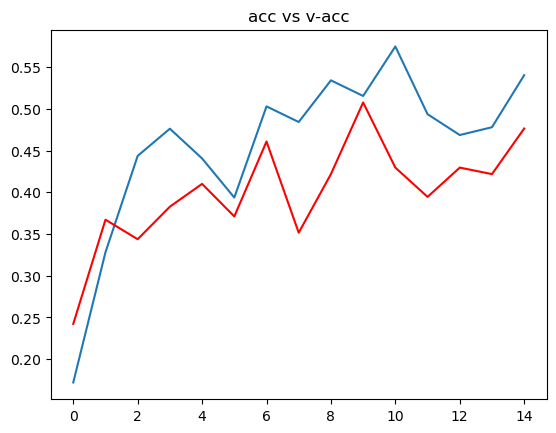

In [14]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

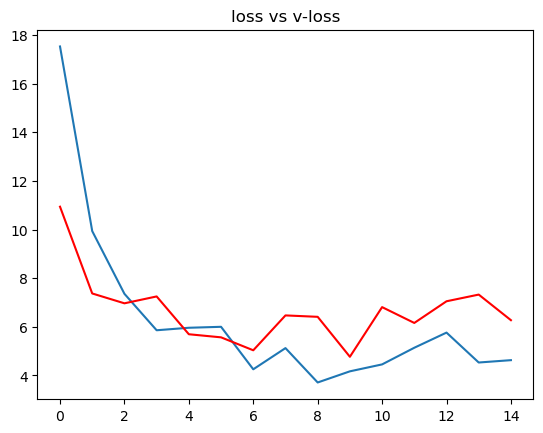

In [15]:

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

1/1 [==============================] - 0s 68ms/step
 the image is of anger


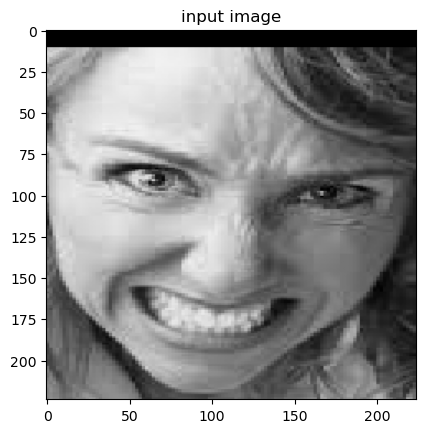

In [19]:
tmp = dict(zip( train_dataset.class_indices.values(), train_dataset.class_indices.keys()))
path = "dataset/test/anger/2Q__ (3)_face.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {tmp[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()